In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 453 kB 46.0 MB/s 


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import re
#from wordcloud import WordCloud

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import os
path ="/content/drive/Shareddrives/흐사드/가공데이터/sometrend_제외어_및_포함어_원문/아로나민골드_원문_최종/"
target_list=os.listdir(path)
target_list

['워드클라우드',
 '아로나민골드, 그 외_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '아로나민골드, 그 외_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '아로나민골드, 그 외_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180

In [ ]:
target_list

['워드클라우드',
 '아로나민골드, 그 외_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '아로나민골드, 그 외_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '아로나민골드, 그 외_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180

In [ ]:
target_list

['타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180301_20180331 (5).xlsx',
 '타겟분석_원문_20180301_20180331 (6).xlsx',
 '타겟분석_원문_20180401_20180430.xlsx',
 '타겟분석_원문_20180401_20180430 (1).xlsx',
 '타겟분석_워

In [ ]:
# pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
target_list

['타겟분석_원문_20180101_20180131.xlsx',
 '타겟분석_원문_20180101_20180131 (1).xlsx',
 '타겟분석_원문_20180101_20180131 (3).xlsx',
 '타겟분석_원문_20180101_20180131 (4).xlsx',
 '타겟분석_원문_20180101_20180131 (5).xlsx',
 '타겟분석_원문_20180201_20180228.xlsx',
 '타겟분석_원문_20180201_20180228 (1).xlsx',
 '타겟분석_원문_20180201_20180228 (2).xlsx',
 '타겟분석_원문_20180201_20180228 (3).xlsx',
 '타겟분석_원문_20180201_20180228 (4).xlsx',
 '타겟분석_원문_20180201_20180228 (6).xlsx',
 '타겟분석_원문_20180301_20180331.xlsx',
 '타겟분석_원문_20180301_20180331 (1).xlsx',
 '타겟분석_원문_20180301_20180331 (2).xlsx',
 '타겟분석_원문_20180301_20180331 (3).xlsx',
 '타겟분석_원문_20180301_20180331 (4).xlsx',
 '타겟분석_원문_20180301_20180331 (5).xlsx',
 '타겟분석_원문_20180301_20180331 (6).xlsx',
 '타겟분석_원문_20180401_20180430.xlsx',
 '타겟분석_원문_20180401_20180430 (1).xlsx',
 '타겟분석_워

In [ ]:
import openpyxl
path = '/content/drive/Shareddrives/흐사드/가공데이터/sometrend_제외어_및_포함어_원문/아로나민골드_원문_최종/'

female= []
for i in target_list:
  a = path + i
  wb =openpyxl.load_workbook(a)
  sheet = wb.get_sheet_by_name('검색 조건')
  if sheet['C6'].value == '여성':
    female.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [ ]:
female

['타겟분석_원문_20180101_20180131 (5).xlsx',
 '타겟분석_원문_20180301_20180331 (5).xlsx',
 '타겟분석_원문_20180401_20180430 (5).xlsx',
 '타겟분석_원문_20180501_20180531 (5).xlsx',
 '타겟분석_원문_20180601_20180630 (5).xlsx',
 '타겟분석_원문_20180701_20180731 (5).xlsx',
 '타겟분석_원문_20180801_20180831 (5).xlsx',
 '타겟분석_원문_20180901_20180930 (5).xlsx',
 '타겟분석_원문_20181001_20181031 (5).xlsx',
 '타겟분석_원문_20181101_20181130 (5).xlsx',
 '타겟분석_원문_20181201_20181231 (5).xlsx',
 '타겟분석_원문_20190101_20190131 (5).xlsx',
 '타겟분석_원문_20190201_20190228 (5).xlsx',
 '타겟분석_원문_20190301_20190331 (5).xlsx',
 '타겟분석_원문_20190401_20190430 (5).xlsx',
 '타겟분석_원문_20190501_20190531 (5).xlsx',
 '타겟분석_원문_20190601_20190630 (5).xlsx',
 '타겟분석_원문_20190701_20190731 (5).xlsx',
 '타겟분석_원문_20190801_20190831 (5).xlsx',
 '타겟분석_원문_20190901_20190930 (5).xlsx',


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 엑셀합치기

In [ ]:
path = '/content/drive/Shareddrives/흐사드/가공데이터/sometrend_제외어_및_포함어_원문/아로나민골드_원문_최종/'

list_female = [] 

list_of_ages = [] # 빈 list를 만듦.
for fname in female:
  a=path + fname
  df_tem = pd.read_excel(a,sheet_name = '원문 - 커뮤니티')
  list_female.append(df_tem) # 매 Loop에서 취해진 DataFrame을 위의 list에 적재함.
df_female = pd.concat(list_female,axis = 0, ignore_index = True) # list 속 DataFrame들을 일괄 병합함.

In [ ]:
df_female

,No.,채널,날짜,작성자,제목,URL
0,1,당진엄마들의모임,20180131,아들************,아...갑자기 친구중에 젤친한친구 아버지 돌아가셔서 급 부산까지 가게 되네요... ...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
1,2,광주맘 수다방,20180129,메시*****************,약국에서만사야되나요?_x000d_\n싸게살수있는곳있을까요?,http://cafe.naver.com/ArticleRead.nhn?clubid=2...
2,3,카페파우더룸3,20180128,ek**************,있으신가요? 뭐드세요?? _x000d_\n저 좀 먹어야겠어요..... _x000d...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
3,4,목포맘들의 수다방,20180116,늙은*************,요즘 저희신랑 매일야근에 일욜도 출근 _x000d_\n이눔의 만성피로는 언제쯤 없어...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
4,5,대구맘365,20180115,경산*****************,저렴하다는 그 약국!_x000d_\n좌표좀 알려주세요ㅜ_x000d_\n아로나민골드...,http://cafe.naver.com/ArticleRead.nhn?clubid=2...
...,...,...,...,...,...,...
939,18,창원 줌마렐라,20180205,민트*************,"삐콤씨, 아로나민 골드 저렴히 파는 약국 있나요? _x000d_\n맘님들은 영양제 ...",http://cafe.naver.com/ArticleRead.nhn?clubid=1...
940,19,파주맘,20180205,허당**********,아로나민 골드 저렴하게 파시는 분 연락주세요. _x000d_\n010-3786-2...,http://cafe.naver.com/ArticleRead.nhn?clubid=1...
941,20,세종맘모여라,20180203,08***************,효과보신분??계셔욤?,http://cafe.naver.com/ArticleRead.nhn?clubid=2...
942,21,인천맘의 아띠아모,20180201,츄잉************,지금 먹고 있는 건 피로회복에 좋은 걸로_x000d_\n밀크씨슬이랑 비타민b 들어있...,http://cafe.naver.com/ArticleRead.nhn?clubid=2...


In [ ]:
len(df_female)

944

In [ ]:
df_female = df_female.drop(['채널'], axis = 1)
df_female = df_female.drop(['작성자'], axis = 1)
df_female = df_female.drop(['URL'], axis = 1)
df_female = df_female.drop(['No.'], axis = 1)
df_female = df_female.drop(['날짜'], axis = 1)

In [ ]:
df_female

,제목
0,아...갑자기 친구중에 젤친한친구 아버지 돌아가셔서 급 부산까지 가게 되네요... ...
1,약국에서만사야되나요?_x000d_\n싸게살수있는곳있을까요?
2,있으신가요? 뭐드세요?? _x000d_\n저 좀 먹어야겠어요..... _x000d...
3,요즘 저희신랑 매일야근에 일욜도 출근 _x000d_\n이눔의 만성피로는 언제쯤 없어...
4,저렴하다는 그 약국!_x000d_\n좌표좀 알려주세요ㅜ_x000d_\n아로나민골드...
...,...
939,"삐콤씨, 아로나민 골드 저렴히 파는 약국 있나요? _x000d_\n맘님들은 영양제 ..."
940,아로나민 골드 저렴하게 파시는 분 연락주세요. _x000d_\n010-3786-2...
941,효과보신분??계셔욤?
942,지금 먹고 있는 건 피로회복에 좋은 걸로_x000d_\n밀크씨슬이랑 비타민b 들어있...


In [ ]:
df_female=df_female.dropna()
df_female

,제목
0,아...갑자기 친구중에 젤친한친구 아버지 돌아가셔서 급 부산까지 가게 되네요... ...
1,약국에서만사야되나요?_x000d_\n싸게살수있는곳있을까요?
2,있으신가요? 뭐드세요?? _x000d_\n저 좀 먹어야겠어요..... _x000d...
3,요즘 저희신랑 매일야근에 일욜도 출근 _x000d_\n이눔의 만성피로는 언제쯤 없어...
4,저렴하다는 그 약국!_x000d_\n좌표좀 알려주세요ㅜ_x000d_\n아로나민골드...
...,...
939,"삐콤씨, 아로나민 골드 저렴히 파는 약국 있나요? _x000d_\n맘님들은 영양제 ..."
940,아로나민 골드 저렴하게 파시는 분 연락주세요. _x000d_\n010-3786-2...
941,효과보신분??계셔욤?
942,지금 먹고 있는 건 피로회복에 좋은 걸로_x000d_\n밀크씨슬이랑 비타민b 들어있...


In [ ]:
total_data=df_female

In [ ]:
total_data=total_data.drop_duplicates()

In [ ]:
total_data

,제목
0,아...갑자기 친구중에 젤친한친구 아버지 돌아가셔서 급 부산까지 가게 되네요... ...
1,약국에서만사야되나요?_x000d_\n싸게살수있는곳있을까요?
2,있으신가요? 뭐드세요?? _x000d_\n저 좀 먹어야겠어요..... _x000d...
3,요즘 저희신랑 매일야근에 일욜도 출근 _x000d_\n이눔의 만성피로는 언제쯤 없어...
4,저렴하다는 그 약국!_x000d_\n좌표좀 알려주세요ㅜ_x000d_\n아로나민골드...
...,...
939,"삐콤씨, 아로나민 골드 저렴히 파는 약국 있나요? _x000d_\n맘님들은 영양제 ..."
940,아로나민 골드 저렴하게 파시는 분 연락주세요. _x000d_\n010-3786-2...
941,효과보신분??계셔욤?
942,지금 먹고 있는 건 피로회복에 좋은 걸로_x000d_\n밀크씨슬이랑 비타민b 들어있...


In [ ]:
a=total_data.values.tolist()

In [ ]:
type(a)

list

In [ ]:
s=""
for i in a:
  s+=i[0]

In [ ]:
s

"아...갑자기 친구중에 젤친한친구 아버지 돌아가셔서 급 부산까지 가게 되네요... _x000d_\n조의...약국에서만사야되나요?_x000d_\n싸게살수있는곳있을까요?있으신가요? 뭐드세요?? _x000d_\n저 좀 먹어야겠어요.....  _x000d_\n어디껄 사먹을까요..휴......요즘 저희신랑 매일야근에 일욜도 출근 _x000d_\n이눔의 만성피로는 언제쯤 없어질지 _x000d_\n임팩타민 아...저렴하다는 그 약국!_x000d_\n좌표좀  알려주세요ㅜ_x000d_\n아로나민골드 사야하는데_x000d_\n얼마에 구입가능한지...상피내암으로 수술 방사후에...타목시펜먹은지는..1년가까이됩니다. _x000d_\n타목시펜먹으면서..아...지금 아로나민골드랑 비타민c만 막였는데 너무 신경 안쓴거 같아요ㅜ_x000d_\n잘챙겨 먹이시는분들 어...춘천에 영양제(아로나민골드,우루사,인사돌 등등) 저렴한 약국이 어디일까요?아로나민골드와 임팩타민중?_x000d_\n어떤 약이 더 효과가 좋은가요?_x000d_\n40넘으니 제몸 제가 챙겨야...그냥 근처에서 25000원주고 사는데_x000d_\n오늘 다른데 가니 거기는 26000원이네요ㅠ _x000d_\n약...혹시 아로나민 골드 드셔보신분 계신가요? 예전엔 안그랬는데 사십대초반 되면서 자고 일어나면...아로나민골드말고 눈영양제 뭐가있을까요?정말  괜찮은 눈영양제  뭐가있을ㄲㅏ요? _x000d_\n  _x000d_\n...종합비타민 영양제좀 살려는데...._x000d_\n(아로나민골드, 씨플러스ㅡ얼라이브ㅡ센트룸ㅡ임펙타민)_x000d_...남편도 저도 골골되기 바빠요_x000d_\n아침에도 너무 피곤해서 못일어나고 ㅠㅠㅠㅠ 무겁고 무기력 ㅠ...50대 중반 남성 영양제 추천해주세요!_x000d_\n원래 아로나민골드 하나 드셨는데 다떨어지셨다해서_x000d_...아로나민골드 같은 영양제 저렴히 파는 약국 어디 있을까요? _x000d_\n예전에 보면 조금 큰 약국들...신랑이 간이 안좋아_x000d_\n피로를 많이 느끼네요_x

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
k=okt.nouns(s)
k

['갑자기',
 '친구',
 '젤',
 '친한친구',
 '아버지',
 '급',
 '부산',
 '가게',
 '조의',
 '약국',
 '살수',
 '곳',
 '가요',
 '뭐',
 '저',
 '좀',
 '어디',
 '껄',
 '요즘',
 '신랑',
 '야근',
 '일욜',
 '출근',
 '이눔',
 '피로',
 '언제',
 '임팩타민',
 '그',
 '약국',
 '좌표',
 '좀',
 '로나',
 '민',
 '골드',
 '얼마',
 '구입',
 '상피',
 '암',
 '수술',
 '방사',
 '후',
 '목시',
 '펜',
 '목시',
 '펜',
 '지금',
 '로나',
 '민',
 '골드',
 '비타민',
 '만',
 '신경',
 '분',
 '춘천',
 '양제',
 '로나',
 '민',
 '골드',
 '우루사',
 '인사',
 '돌',
 '등등',
 '약국',
 '어디',
 '요',
 '로나',
 '민',
 '골드',
 '임팩타',
 '민중',
 '약',
 '더',
 '효과',
 '몸',
 '제',
 '그냥',
 '근처',
 '오늘',
 '거기',
 '약',
 '혹시',
 '로나',
 '민',
 '골드',
 '보신',
 '예전',
 '초반',
 '자고',
 '로나',
 '민',
 '골드',
 '눈',
 '양제',
 '뭐',
 '정말',
 '눈',
 '양제',
 '뭐',
 '요',
 '종합',
 '비타민',
 '좀',
 '로나',
 '민',
 '골드',
 '씨',
 '플러스',
 '얼라이브',
 '센트',
 '룸',
 '임펙타민',
 '남편',
 '저',
 '아침',
 '무기',
 '중반',
 '남성',
 '양제',
 '추천',
 '원래',
 '로나',
 '민',
 '골드',
 '하나',
 '다해',
 '로나',
 '민',
 '골드',
 '양제',
 '약국',
 '어디',
 '예전',
 '조금',
 '약국',
 '신랑',
 '간이',
 '피로',
 '술',
 '혹시',
 '추천',
 '강',
 '장제',
 '간',
 '신랑',
 '요새',
 '로나',
 '민',


In [ ]:
type(k)

list

In [ ]:

remove_set = {'로','나민','민','로나','골드','양제','젤','급','뭐','저','좀','요','제','비타민'}

li = [i for i in k if i not in remove_set]
print(li)

['갑자기', '친구', '친한친구', '아버지', '부산', '가게', '조의', '약국', '살수', '곳', '가요', '어디', '껄', '요즘', '신랑', '야근', '일욜', '출근', '이눔', '피로', '언제', '임팩타민', '그', '약국', '좌표', '얼마', '구입', '상피', '암', '수술', '방사', '후', '목시', '펜', '목시', '펜', '지금', '만', '신경', '분', '춘천', '우루사', '인사', '돌', '등등', '약국', '어디', '임팩타', '민중', '약', '더', '효과', '몸', '그냥', '근처', '오늘', '거기', '약', '혹시', '보신', '예전', '초반', '자고', '눈', '정말', '눈', '종합', '씨', '플러스', '얼라이브', '센트', '룸', '임펙타민', '남편', '아침', '무기', '중반', '남성', '추천', '원래', '하나', '다해', '약국', '어디', '예전', '조금', '약국', '신랑', '간이', '피로', '술', '혹시', '추천', '강', '장제', '간', '신랑', '요새', '사서', '신랑', '피곤', '해', '피로', '회복', '중이', '밀크', '슬', '중', '고민', '남편', '유산균', '캡슐', '된거', '종합', '그냥', '요즘', '해외', '지방', '출장', '밥', '건강', '상', '걱정', '수면', '부족', '과로', '회사', '계단', '후', '회사', '동료', '주네', '서울', '남대문', '인천', '어디가', '신랑', '약', '사람', '그동안', '후반', '기력', '어디가', '어머님', '사오', '돈', '가까이', '신랑', '이제', '하나', '아마', '육', '약국', '가격', '대서', '가격', '약국', '남편', '피로', '편이', '잠', '자도', '푹', '듯', '얼마', '전', '건강검진', '처방', '사면

In [ ]:
c = Counter(li) 

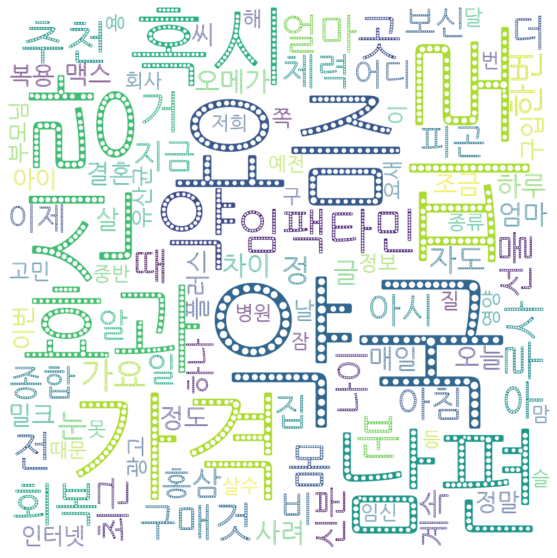

In [ ]:
wordcloud = WordCloud().generate(s)

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300)
wc = wc.generate_from_frequencies(c)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()